In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1ff3a786d50>)

In [4]:
pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [6]:
medical_df = pd.read_csv('medical.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
pip install plotly matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [61]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

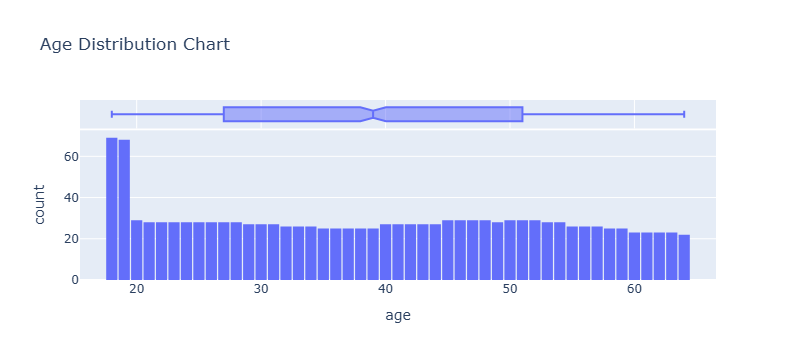

In [20]:
fig = px.histogram(medical_df, x = 'age', marginal = 'box', nbins = 47, title = 'Age Distribution Chart')
fig.update_layout(bargap = 0.1)
fig.show()

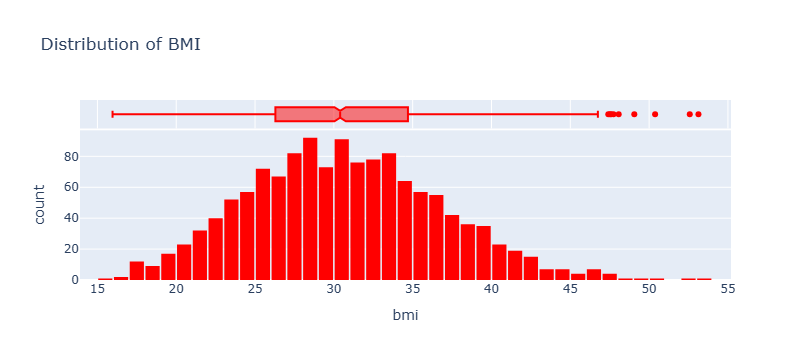

In [12]:
fig = px.histogram(medical_df, x = 'bmi', marginal = 'box', color_discrete_sequence = ["red"], title = 'Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()

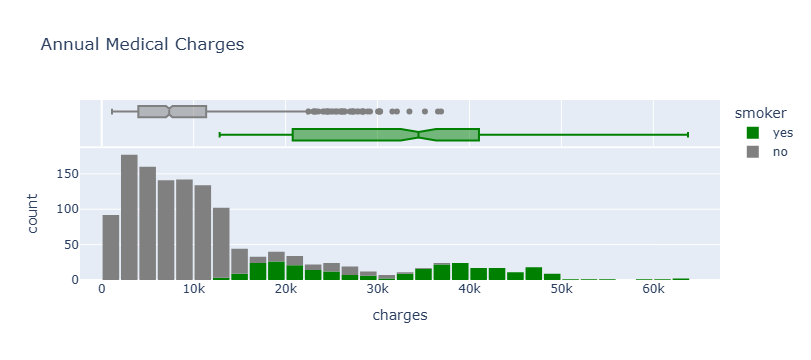

In [17]:
fig = px.histogram(medical_df, x = "charges", marginal = "box", color = "smoker", color_discrete_sequence = ["green","grey"], title = "Annual Medical Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [19]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

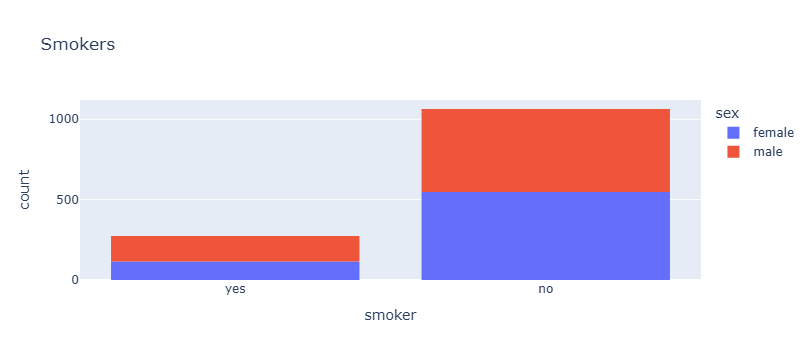

In [20]:
px.histogram(medical_df, x= "smoker", color = "sex", title = "Smokers")

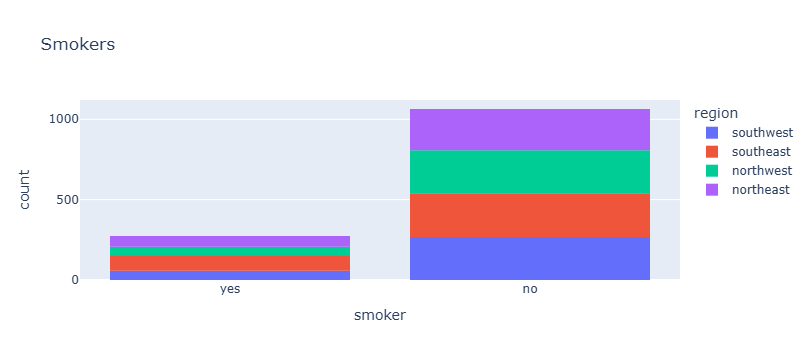

In [21]:
px.histogram(medical_df, x= "smoker", color = "region", title = "Smokers")

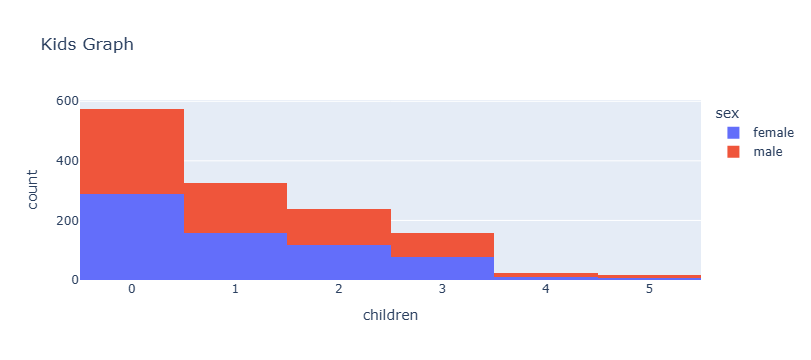

In [23]:
px.histogram(medical_df, x= "children", color = "sex", title = "Kids Graph")

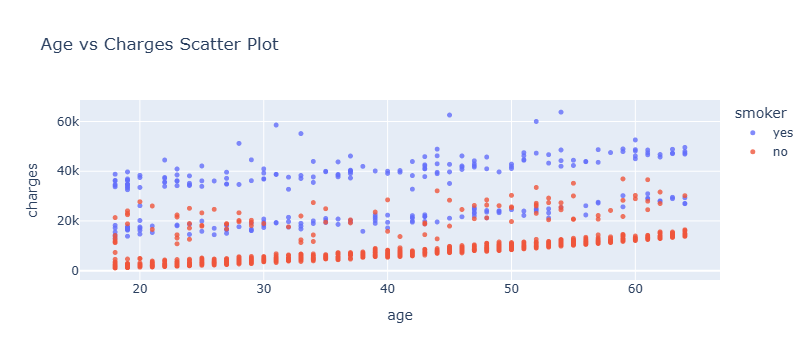

In [26]:
fig = px.scatter(medical_df, x = "age", y = "charges", color = "smoker", opacity = 0.8, hover_data = ["sex"], title = "Age vs Charges Scatter Plot")
fig.update_traces(marker_size = 5)
fig.show()

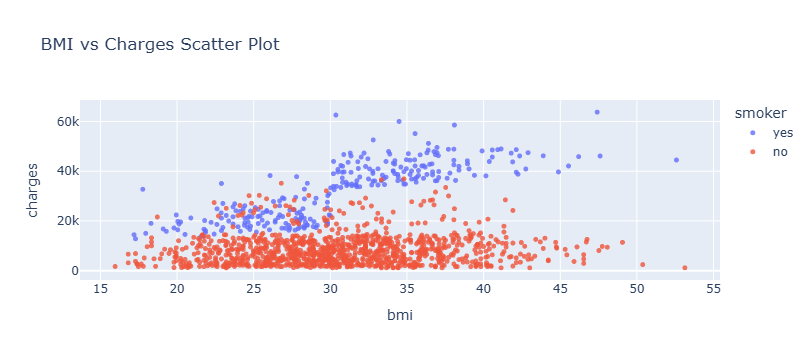

In [27]:
fig = px.scatter(medical_df, x = "bmi", y = "charges", color = "smoker", opacity = 0.8, hover_data = ["sex"], title = "BMI vs Charges Scatter Plot")
fig.update_traces(marker_size = 5)
fig.show()

In [35]:
print(medical_df.charges.corr(medical_df.age))

0.2990081933306478


In [31]:
print(medical_df.charges.corr(medical_df.bmi))

0.19834096883362887


In [21]:
smoker_values = {"yes": 1, "no": 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [22]:
print(medical_df.charges.corr(smoker_numeric))

0.7872514304984778


In [25]:
sex_values = {"male": 1, "female": 0}
sex_numeric = medical_df.sex.map(sex_values)
sex_numeric

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [27]:
print(medical_df.charges.corr(sex_numeric))

0.05729206220202533


In [34]:
medical_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [36]:
medical_df.select_dtypes(include = "number").corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


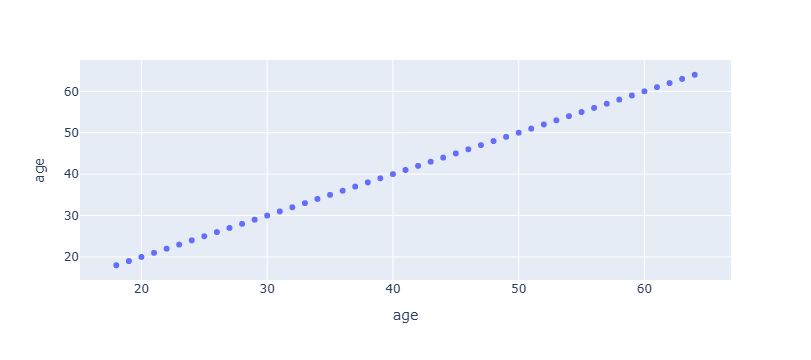

In [9]:
px.scatter(medical_df, x = "age", y = "age")

Text(0.5, 1.0, 'Correlation Matrix')

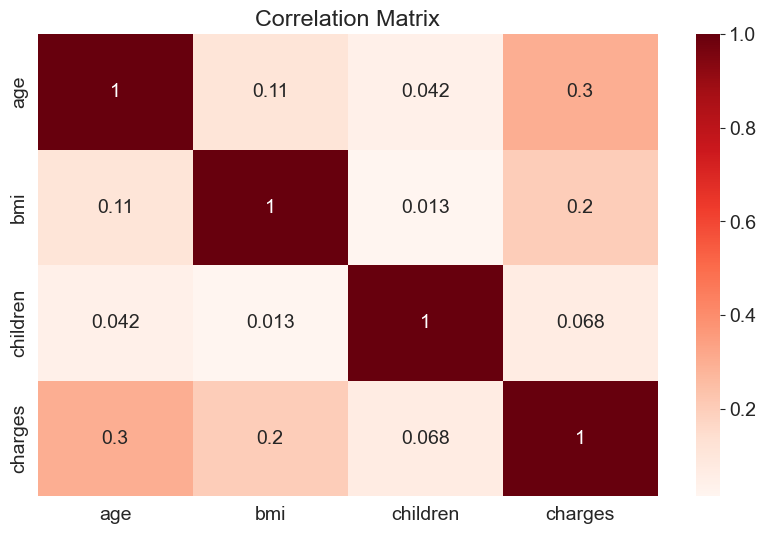

In [15]:
sns.heatmap(medical_df.select_dtypes(include = "number").corr(), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")

In [57]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

Text(0.5, 1.0, 'Ages vs Charges')

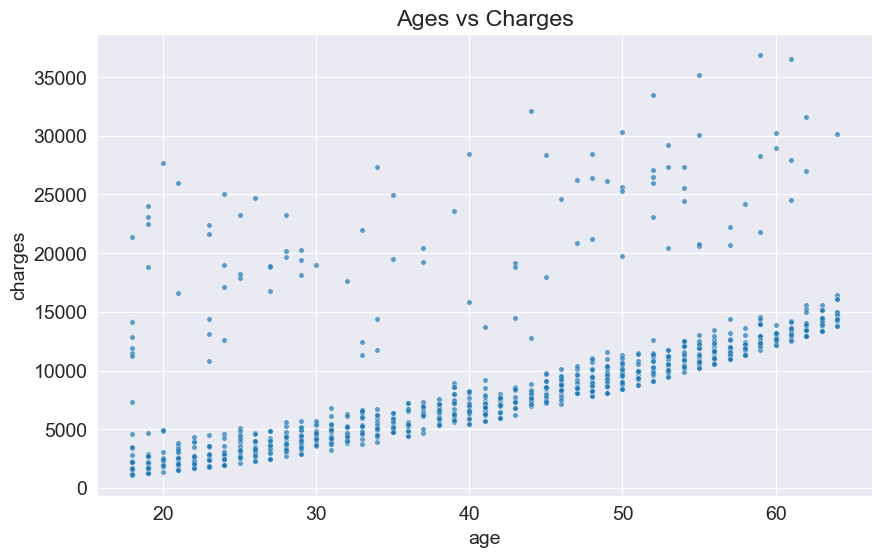

In [18]:
sns.scatterplot(non_smoker_df, x = "age", y = "charges", alpha = 0.7, s = 15)
plt.title("Ages vs Charges")

Model
charges = age * w + b
w = weight
b = bias

In [54]:
def estimate_charges(age, w, b):
    return (age * w) + b

In [55]:
w = 50
b = 100
estimate_charges(40, w, b)

2100

In [58]:
age = non_smoker_df.age
age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [24]:
estimated_charges = estimate_charges(age, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [25]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

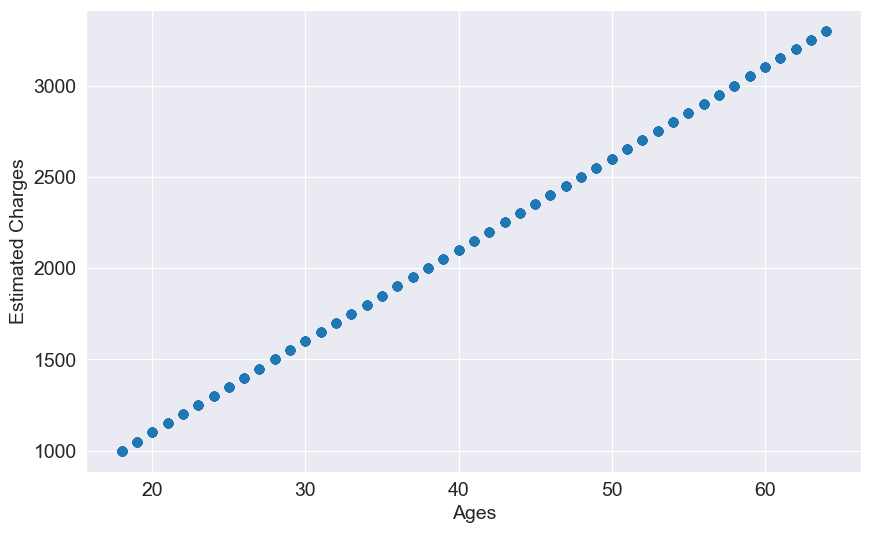

In [30]:
plt.scatter(age, estimated_charges)
plt.xlabel("Ages")
plt.ylabel("Estimated Charges")

Text(0, 0.5, 'Estimated Charges')

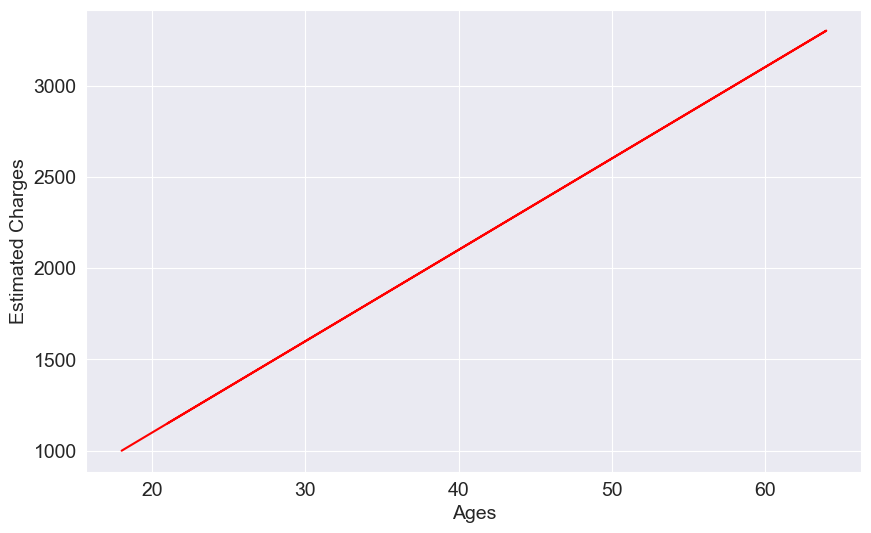

In [33]:
plt.plot(age, estimated_charges, "r-")
plt.xlabel("Ages")
plt.ylabel("Estimated Charges")

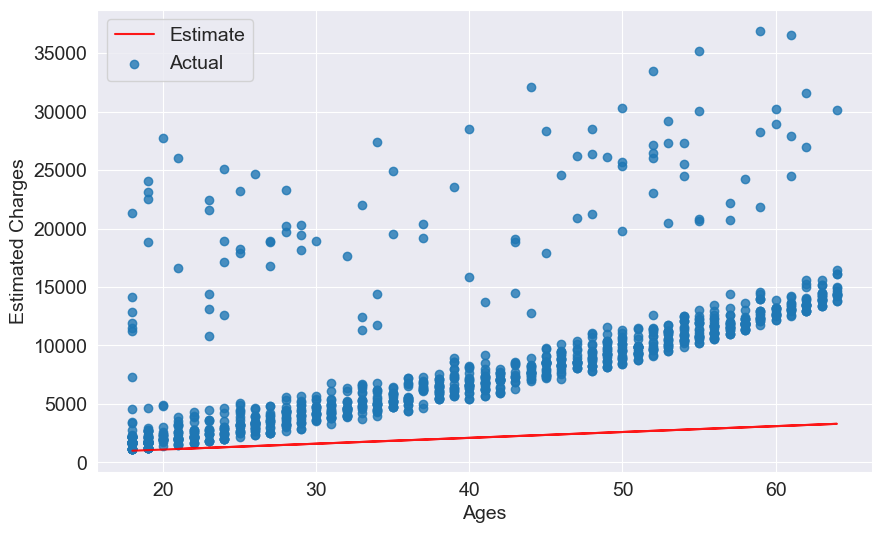

In [38]:
target = non_smoker_df.charges

plt.plot(age, estimated_charges, "r", alpha = 0.9)

plt.scatter(age, target, alpha = 0.8)
plt.xlabel("Ages")
plt.ylabel("Estimated Charges")

plt.legend(["Estimate", "Actual"])

In [39]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(age, w, b)
    
    plt.plot(age, estimated_charges, "r", alpha = 0.9)
    plt.scatter(age, target, s = 8, alpha = 0.8)
    plt.xlabel("Ages")
    plt.ylabel("Estimated Charges")
    
    plt.legend(["Estimate", "Actual"])

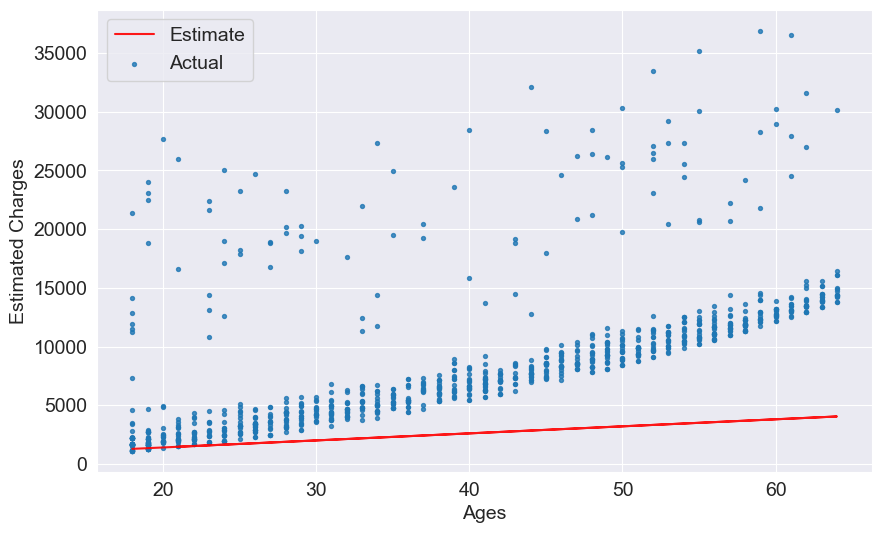

In [41]:
try_parameters(60, 200)

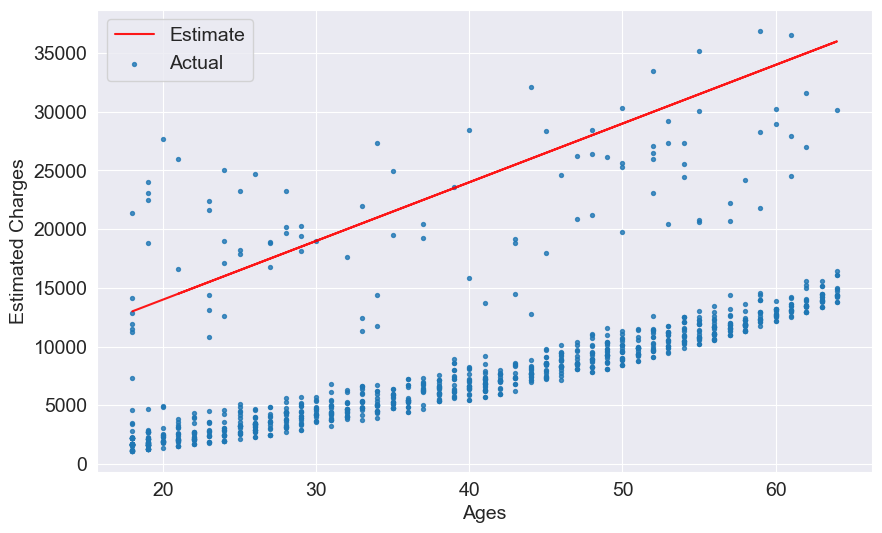

In [43]:
try_parameters(500, 4000)

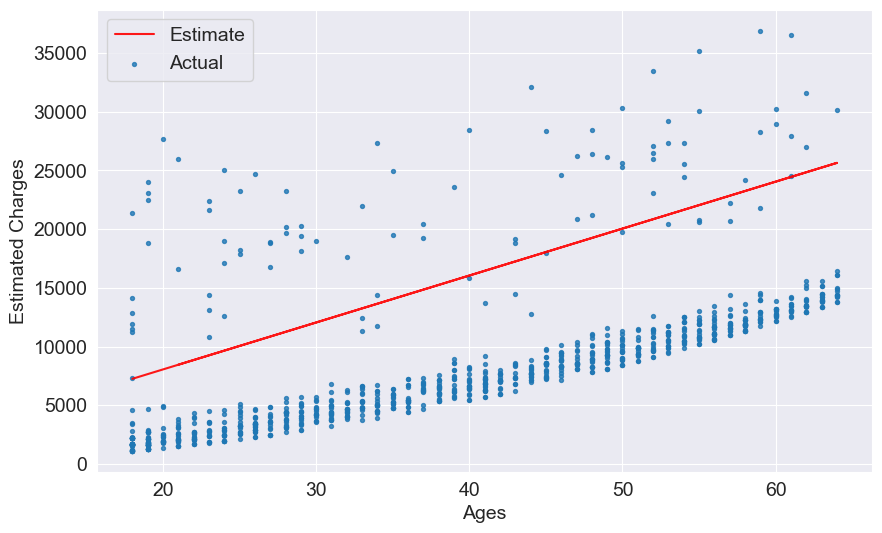

In [48]:
try_parameters(400, 50)

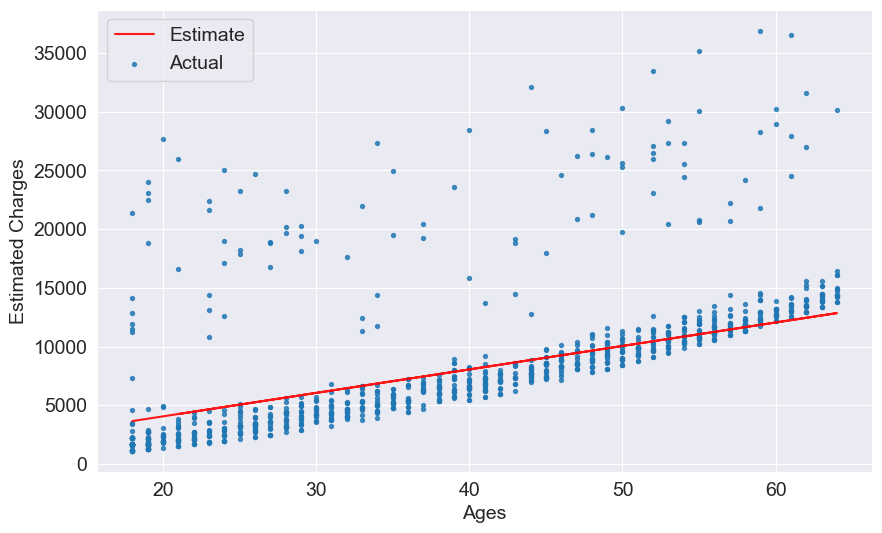

In [50]:
try_parameters(200, 50)

LaTeX: a^2

In [53]:
target = non_smoker_df.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [54]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Root Mean Square Error (RMSE)

In [55]:
pip install numpy --quiet

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np

In [57]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

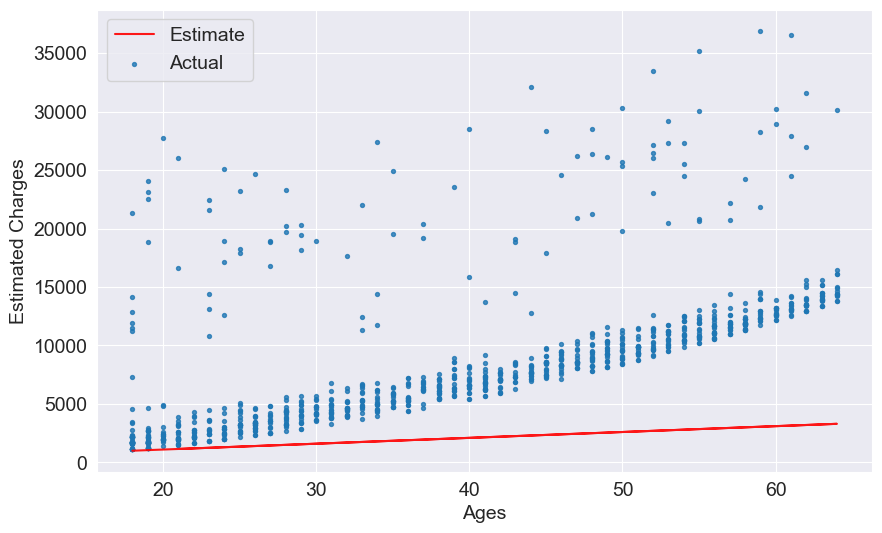

In [58]:
w = 50
b = 100
try_parameters(w, b)

In [60]:
target = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(target, predicted)

np.float64(8461.949562575493)

In [53]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    predictions = estimate_charges(age, w, b)
    
    plt.plot(ages, predictions, "r", alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Ages")
    plt.ylabel("Estimated Charges")
    plt.legend(["Predicted", "Actual"])

    loss = rmse(target, predictions)
    print(f"RMSE Loss: {loss}")

RMSE Loss: 8461.949562575493


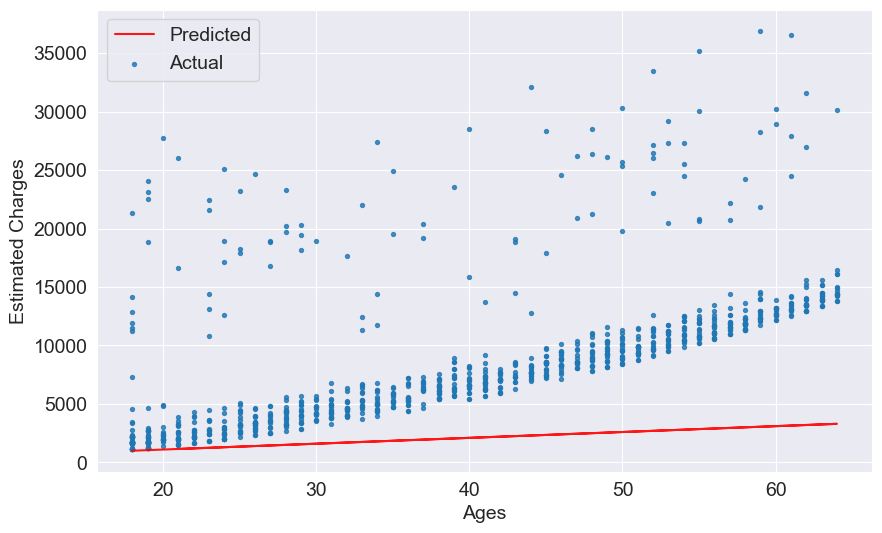

In [76]:
try_parameters(50, 100)

RMSE Loss: 4725.9133994520325


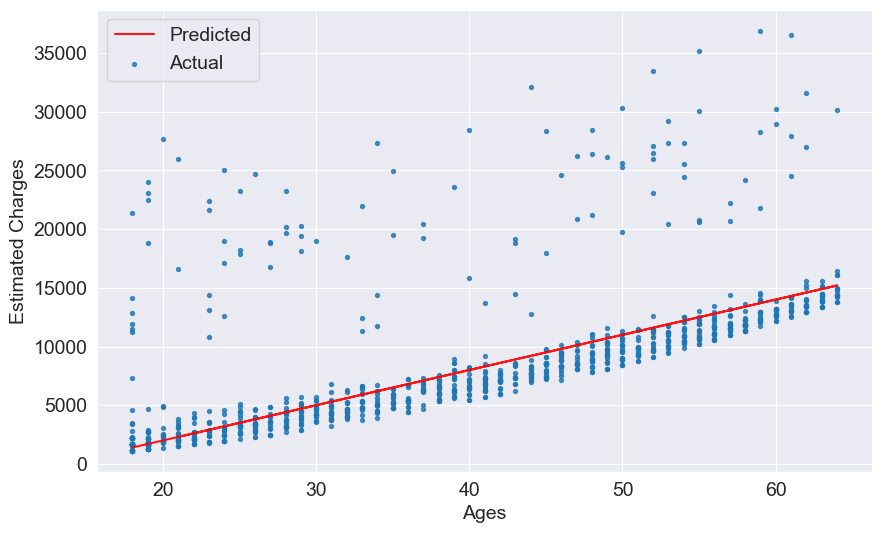

In [80]:
try_parameters(300, -4000)

In [81]:
pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [94]:
model = LinearRegression()

In [88]:
inputs = non_smoker_df[["age"]]
targets = non_smoker_df.charges
print(f"inputs.shape: {inputs.shape}")
print(f"targets.shape: {targets.shape}")

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [90]:
type(inputs)

pandas.core.frame.DataFrame

In [95]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\JFADIPE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [98]:
predictions= model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [99]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [101]:
print(rmse(targets, predictions))

4662.505766636395


In [102]:
#w
model.coef_

array([267.24891283])

In [103]:
#b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss: 4662.505766636395


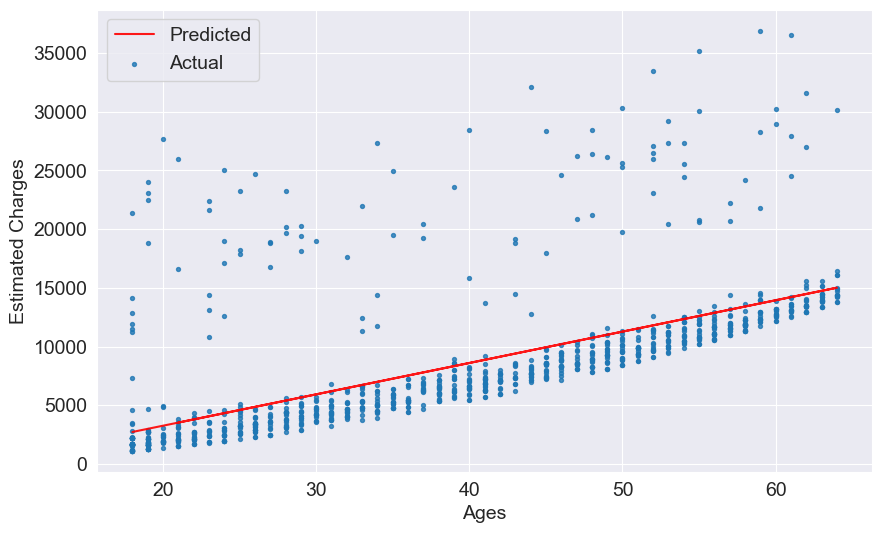

In [104]:
try_parameters(model.coef_, model.intercept_)

In [64]:
from sklearn.linear_model import SGDRegressor
model_2 = SGDRegressor()

In [107]:
help(model_2.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.

    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.

    y : ndarray of shape (n_samples,)
        Target values.

    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.

    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.

    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).

    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [108]:
model_2.fit(inputs, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [110]:
predictions = model_2.predict(inputs)
predictions

array([4190.3368425 , 5931.5686198 , 6802.18450845, ..., 4190.3368425 ,
       4190.3368425 , 4712.70637569], shape=(1064,))

In [111]:
print(rmse(targets, predictions))

4871.150503371178


In [112]:
model_2.coef_

array([174.12317773])

In [113]:
model_2.intercept_

array([1056.11964337])

RMSE Loss: 4871.150503371178


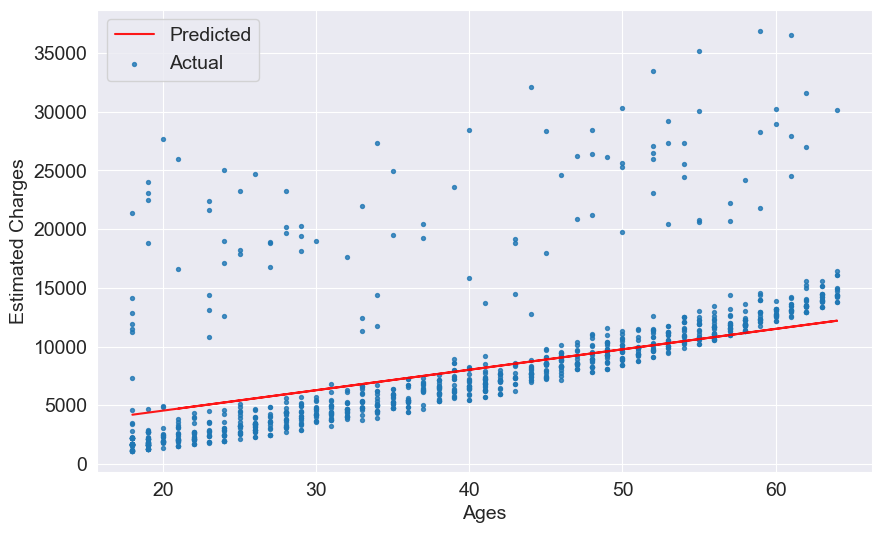

In [114]:
try_parameters(model_2.coef_, model_2.intercept_)



Smokers_Model

In [43]:
smoker_df = medical_df[medical_df.smoker == "yes"]

In [44]:
def estimate_charges(age, w, b):
    return (age * w) + b

In [45]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [59]:
age = non_smoker_df.age
age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [51]:
def try_parameters(w, b):
    ages = smoker_df["age"]
    target = smoker_df.charges

    prediction = estimate_charges(age, w, b)
    
    plt.plot(ages, prediction, "r", alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Ages")
    plt.ylabel("Estimated Charges")
    plt.legend(["Predicted", "Actual"])

    loss = rmse(target, predictions)
    print(f"RMSE Loss: {loss}")

In [47]:
model = LinearRegression()

In [48]:
inputs = smoker_df[["age"]]
targets = smoker_df.charges

In [49]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
predictions = model.predict(inputs)

RMSE Loss: 24338.502872599212


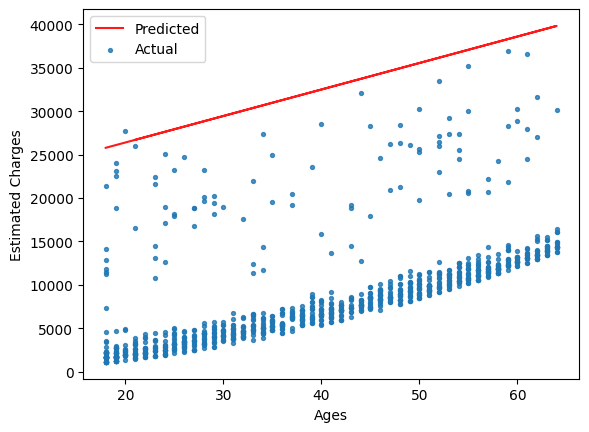

In [62]:
try_parameters(model.coef_, model.intercept_)

In [74]:
from sklearn.linear_model import SGDRegressor
model_2 = SGDRegressor()

In [75]:
model_2.fit(inputs, targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


RMSE Loss: 8174051784.839376


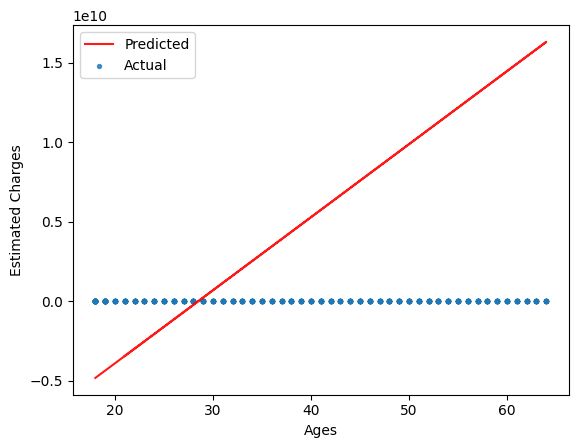

In [76]:
try_parameters(model_2.coef_, model_2.intercept_)

Linear Regression with Multiple Features

y = W1X1 + W2X2 + b

charges = W1 * age + W2 * bmi + b

In [81]:
age = non_smoker_df.age
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"]
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)
loss = rmse(targets, prediction)
print(f"Loss: {loss}")

Loss: 4662.3128354612945


In [82]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [83]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

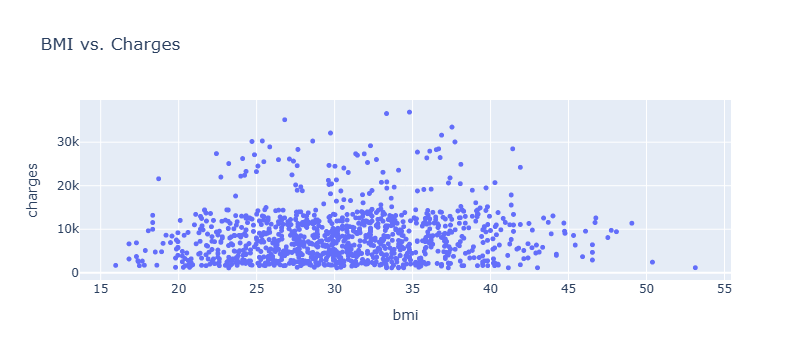

In [84]:
fig = px.scatter(non_smoker_df, x = "bmi", y = "charges", title = "BMI vs. Charges")
fig.update_traces(marker_size = 5)
fig.show()